In [50]:
%matplotlib inline

In [123]:
import numpy as np
from matplotlib import pyplot as plt, animation, rc
rc('animation', html='html5')

In [211]:
total_m = 100
x = np.random.rand(total_m)
y = x * 5  + 3 + (np.random.rand(total_m) - 0.5) / total_m
x_train = x[0:60]
y_train = y[0:60]
x_valid = x[61:80]
y_valid = y[61:80]
x_test = x[81:]
y_test = y[81:]

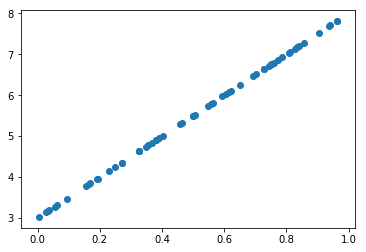

In [212]:
plt.scatter(x_train, y_train)

In [213]:
def hx(a, b, x):
  return a * x + b

In [214]:
def sse(y, y_pred):
    diff = y - y_pred
    return np.sum(diff * diff)
def loss(y, a, b, x):
    return sse(y, hx(a, b, x))
def avg_loss(y, a, b, x):
    return np.average(loss(y, a, b, x)) / 2

In [220]:
lr = 0.1
a_guess = 0
b_guess = 0

In [216]:
def learn_once():
    global a_guess, b_guess
    y_pred = hx(a_guess, b_guess, x_train)
    diff = y_pred - y_train
    total_loss = avg_loss(y_train, a_guess, b_guess, x_train)
    dldb = np.average(diff)
    dlda = np.average(np.multiply(diff, x_train))
    a_guess -= lr * dlda
    b_guess -= lr * dldb
    return np.multiply(diff, diff).mean() / 2

In [217]:
learn_once()

16.161247650800295

In [218]:
epoch = 0
totalLoss = 1

while totalLoss > 0.00001 and epoch <= 30000:
    epoch += 1
    totalLoss = learn_once()
    if epoch % 500 == 0:
        print(epoch, totalLoss, a_guess, b_guess)

diff_valid = hx(a_guess, b_guess, x_valid) - y_valid
valid_error = np.multiply(diff_valid, diff_valid).mean() / 2
print('valid error is: ', valid_error)

500 0.000542950848948 4.88395962984 3.06223778219
valid error is:  1.37803727318e-05


In [221]:
fig = plt.figure(figsize = (5, 4))
plt.scatter(x_train, y_train)
line, = plt.plot(x_train, hx(a_guess, b_guess, x_train))
plt.close()

def animate(i):
    line.set_ydata(hx(a_guess, b_guess, x_train))
    for i in range(10):
        learn_once()
    return line,
    
ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval = 100)
ani